In [5]:
pip install squarify

In [1]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import string
import random
import string
from sklearn import linear_model
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import squarify

In [2]:
wine_150k = pd.read_csv('winemag-data_first150k.csv',index_col=0)
wine_130k = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)
wine = pd.concat([wine_150k,wine_130k],axis=0)
#wine = wine_150k
print("Number of rows and columns:",wine.shape)
wine.head()


Number of rows and columns: (280901, 13)


,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [20]:
wine_eda = wine.drop(['taster_name', 'taster_twitter_handle', 'title', 'region_2'], axis=1)
# wine_eda.dropna(subset=['country', 'description', 'designation', 'points', 'province', 'price', 'variety', 'winery'], inplace=True)

50

<Axes: xlabel='country'>

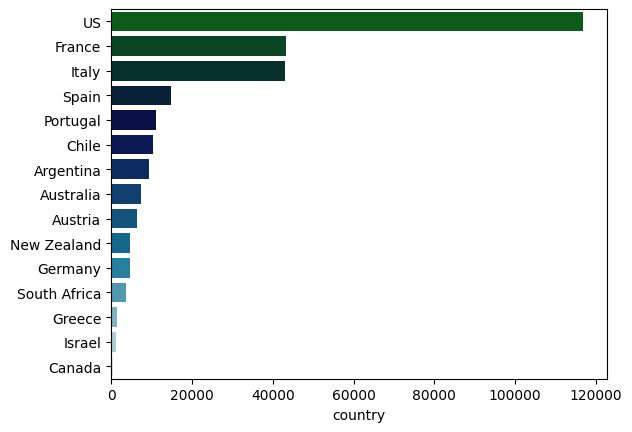

In [ ]:
plt.figure()
country_count = pd.DataFrame(wine_eda['country'].value_counts())[:15]
sns.barplot(x=country_count['country'], y =country_count.index, data=country_count, palette='ocean',orient='h')

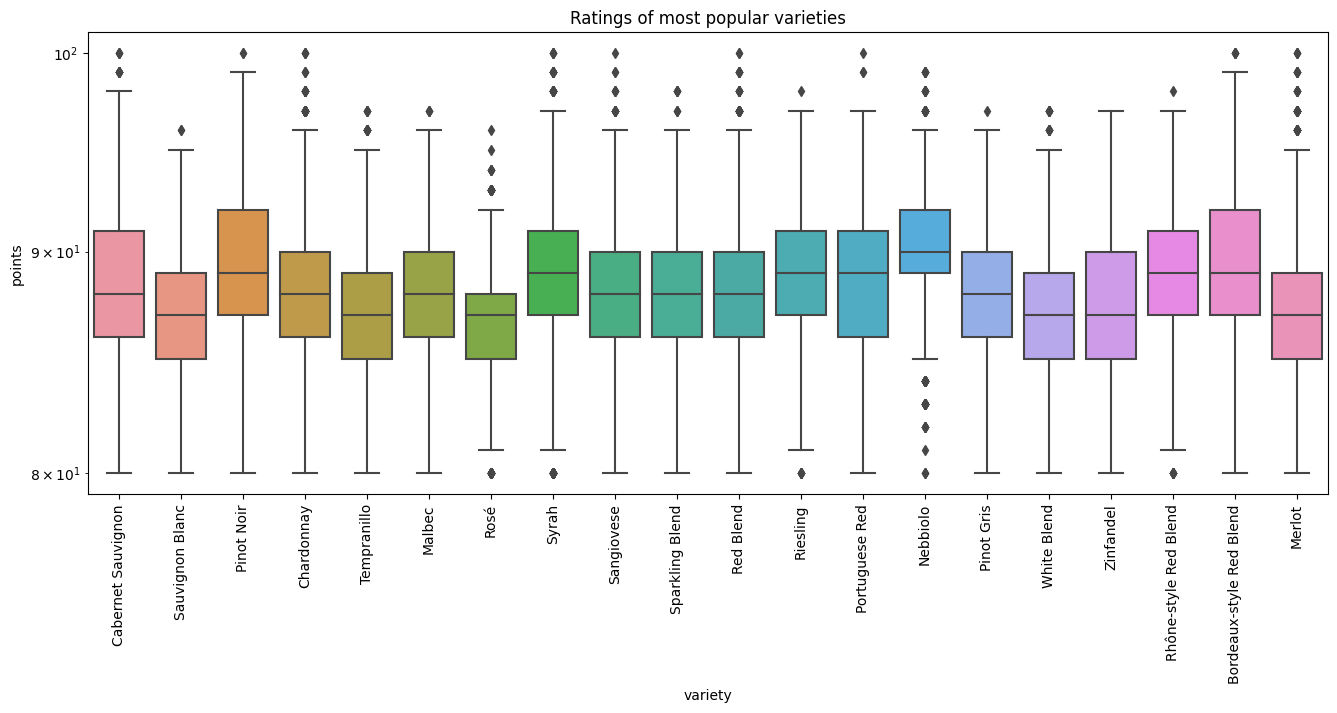

In [ ]:
plt.figure(figsize=(16,6))
variety_count = pd.DataFrame(wine_eda['variety'].value_counts())[:20]
sns.boxplot(x = wine_eda[wine_eda['variety'].isin(variety_count.index)]['variety'], y = wine_eda[wine_eda['variety'].isin(variety_count.index)]['points'])
plt.yscale("log")
plt.title('Ratings of most popular varieties')
plt.xticks(rotation=90);

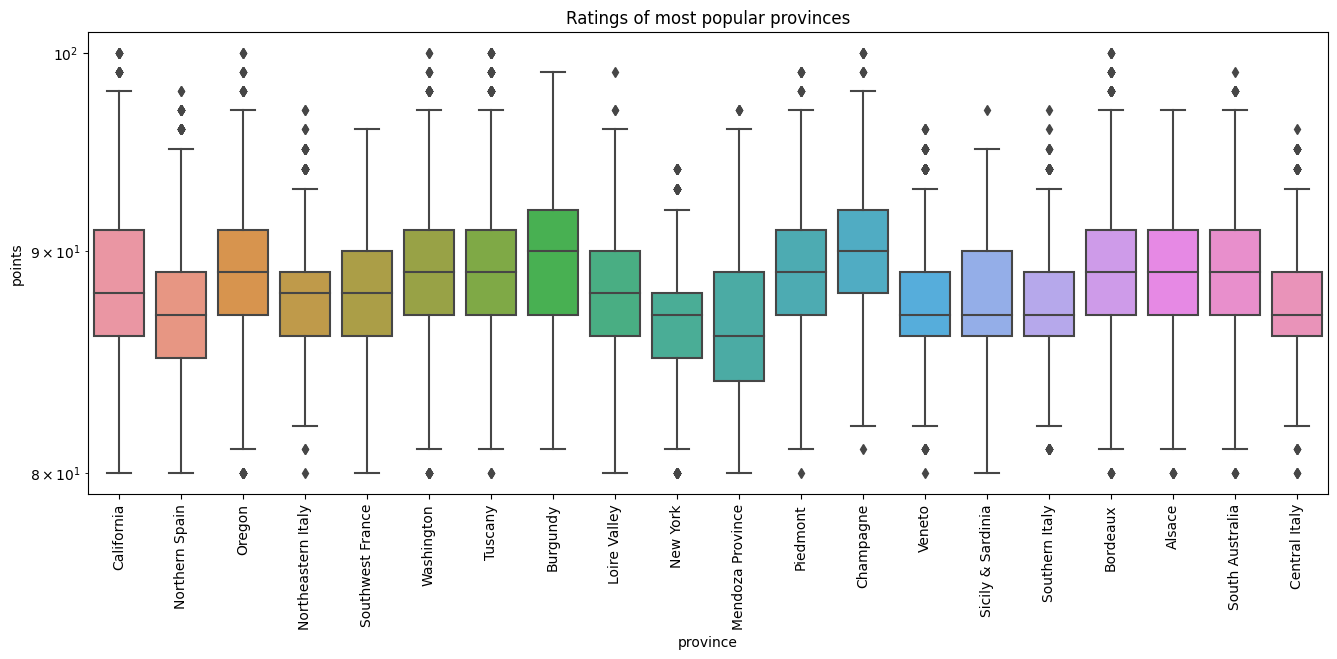

In [ ]:
plt.figure(figsize=(16,6))
province_count = pd.DataFrame(wine_eda['province'].value_counts())[:20]
sns.boxplot(x = wine_eda[wine_eda['province'].isin(province_count.index)]['province'], y = wine_eda[wine_eda['province'].isin(province_count.index)]['points'])
plt.yscale("log")
plt.title('Ratings of most popular provinces')
plt.xticks(rotation=90);

<ipython-input-26-902f76f2d114>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wines_under_20['province_and_variety'] = wines_under_20['province'] + ', ' + wines_under_20['variety']
<ipython-input-26-902f76f2d114>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wines_btwn_20_and_100['province_and_variety'] = wines_btwn_20_and_100['province'] + ', ' + wines_btwn_20_and_100['variety']
<ipython-input-26-902f76f2d114>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Text(0.5, 1.0, 'Highest Rated (Province, Variety) Wines by Price')

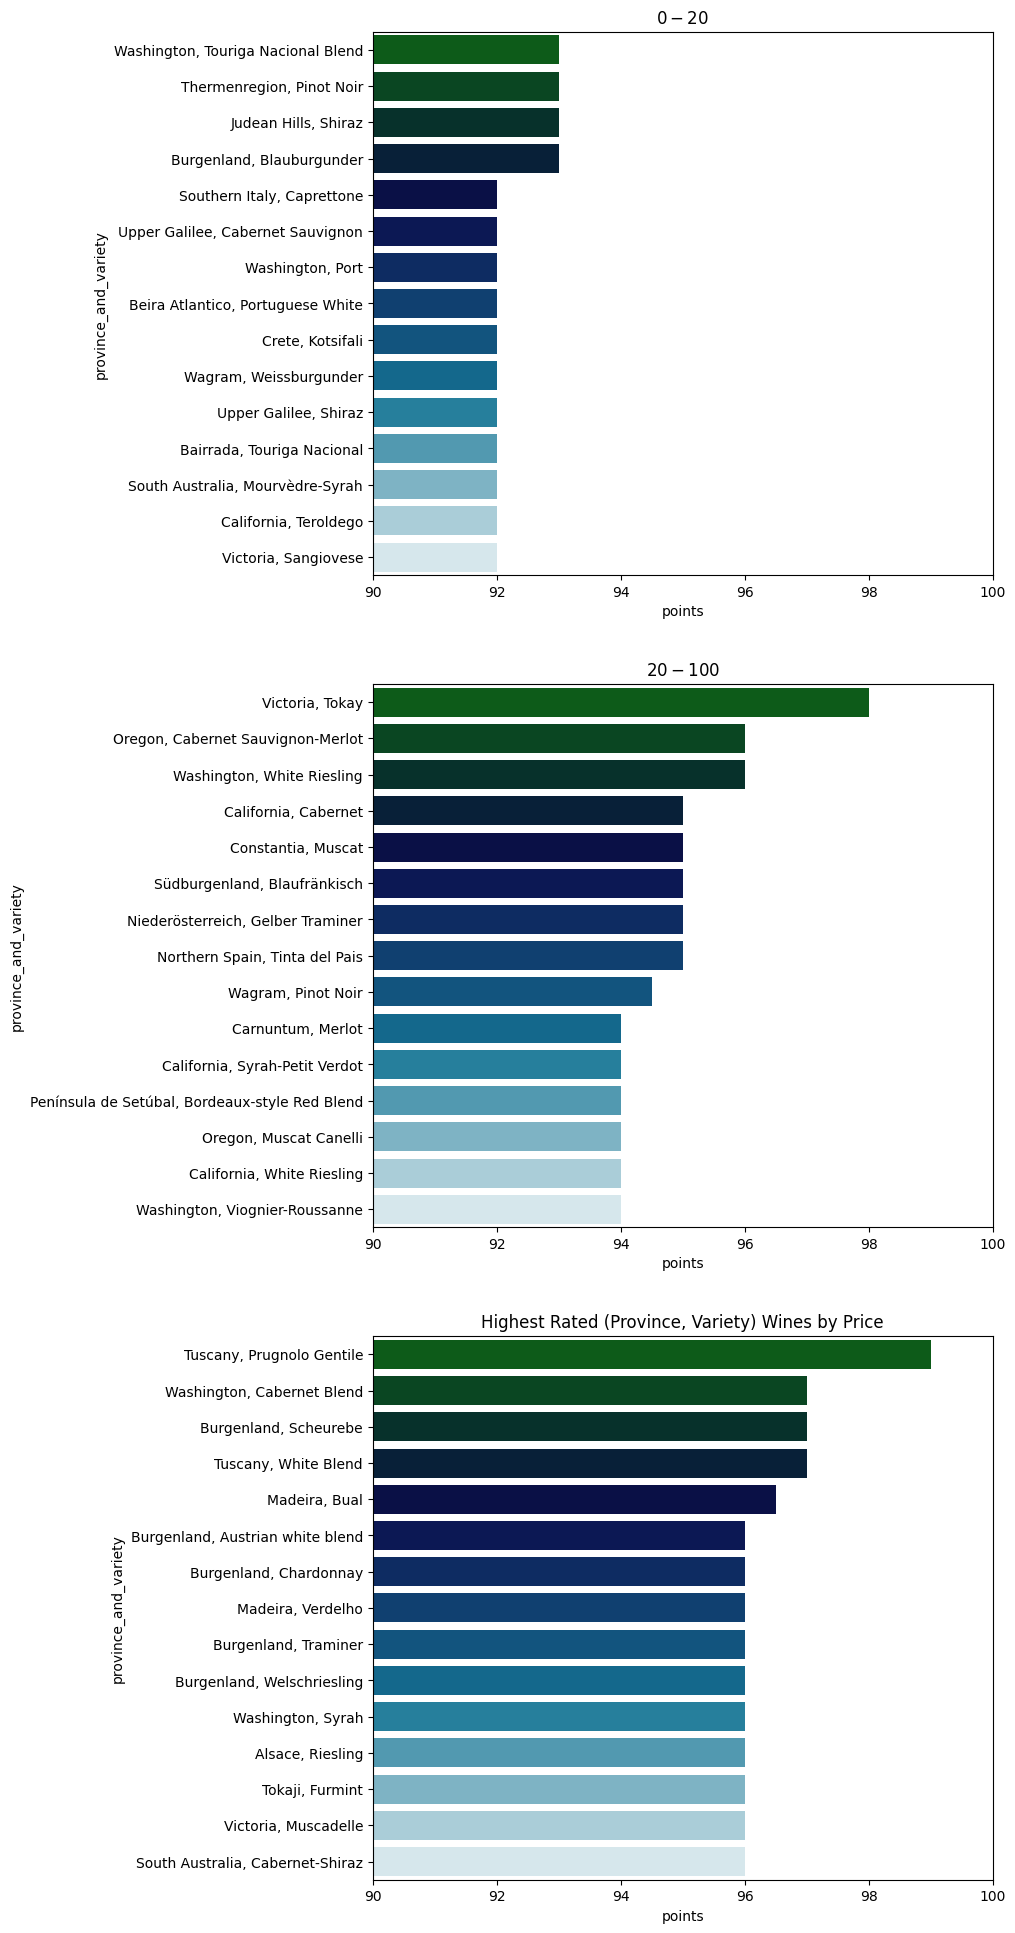

In [ ]:
fx, ax = plt.subplots(3, 1, figsize = (8, 24))
ax1, ax2, ax3 = ax.flatten()

wines_under_20 = wine_eda[wine_eda['price'] < 20]
wines_under_20['province_and_variety'] = wines_under_20['province'] + ', ' + wines_under_20['variety']
wines_under_20_count = wines_under_20.groupby(['province_and_variety'])['points'].median().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=wines_under_20_count['points'], y=wines_under_20_count.index, data=wines_under_20_count, palette='ocean',orient='h', ax=ax1)
ax1.set_xlim(xmin=90, xmax=100)
ax1.set_title('$0-$20')

wines_btwn_20_and_100 = wine_eda[(wine_eda['price'] >= 20) & (wine_eda['price'] < 100)]
wines_btwn_20_and_100['province_and_variety'] = wines_btwn_20_and_100['province'] + ', ' + wines_btwn_20_and_100['variety']
wines_btwn_20_and_100_count = wines_btwn_20_and_100.groupby(['province_and_variety'])['points'].median().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=wines_btwn_20_and_100_count['points'], y=wines_btwn_20_and_100_count.index, data=wines_btwn_20_and_100_count, palette='ocean',orient='h', ax=ax2)
ax2.set_xlim(xmin=90, xmax=100)
ax2.set_title('$20-$100')

wines_btwn_100_and_500 = wine_eda[(wine_eda['price'] >= 100) & (wine_eda['price'] < 500)]
wines_btwn_100_and_500['province_and_variety'] = wines_btwn_100_and_500['province'] + ', ' + wines_btwn_100_and_500['variety']
wines_btwn_100_and_500_count = wines_btwn_100_and_500.groupby(['province_and_variety'])['points'].median().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=wines_btwn_100_and_500_count['points'], y=wines_btwn_100_and_500_count.index, data=wines_btwn_100_and_500_count, palette='ocean',orient='h', ax=ax3)
ax3.set_xlim(xmin=90, xmax=100)
ax3.set_title('$100-$500')

plt.title('Highest Rated (Province, Variety) Wines by Price')

<ipython-input-70-e65c6e03868c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wines_btwn_20_and_100['province_and_variety'] = wines_btwn_20_and_100['province'] + ', ' + wines_btwn_20_and_100['variety']


(80.0, 102.9)

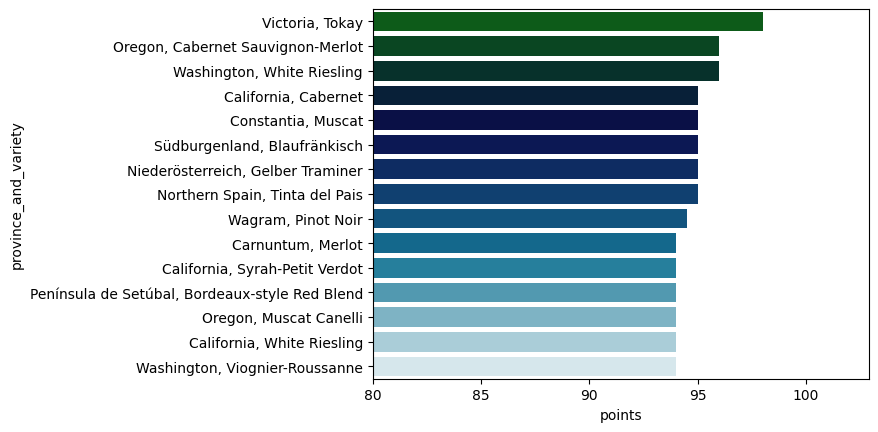

In [ ]:
wines_btwn_20_and_100 = wine_eda[(wine_eda['price'] >= 20) & (wine_eda['price'] < 100)]
wines_btwn_20_and_100['province_and_variety'] = wines_btwn_20_and_100['province'] + ', ' + wines_btwn_20_and_100['variety']
wines_btwn_20_and_100_count = wines_btwn_20_and_100.groupby(['province_and_variety'])['points'].median().sort_values(ascending=False).to_frame()[:15]


sns.barplot(x=wines_btwn_20_and_100_count['points'], y=wines_btwn_20_and_100_count.index, data=wines_btwn_20_and_100_count, palette='ocean',orient='h')
plt.xlim(xmin=80)

<ipython-input-68-53aed7b13a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wines_btwn_100_and_500['province_and_variety'] = wines_btwn_100_and_500['province'] + ', ' + wines_btwn_100_and_500['variety']


(80.0, 103.95)

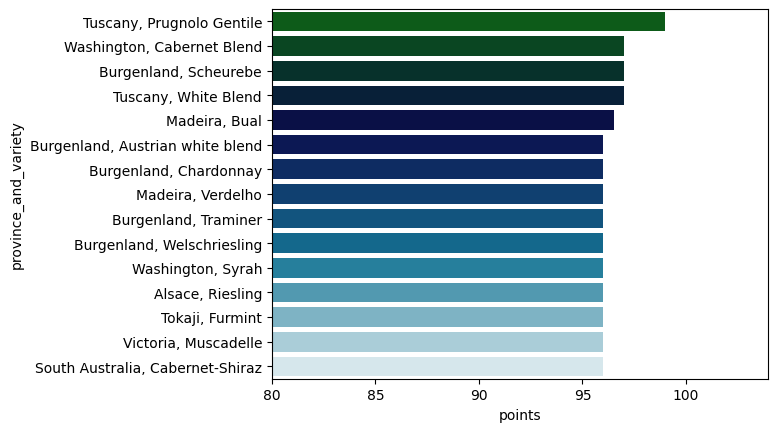

In [ ]:
wines_btwn_100_and_500 = wine_eda[(wine_eda['price'] >= 100) & (wine_eda['price'] < 500)]
wines_btwn_100_and_500['province_and_variety'] = wines_btwn_100_and_500['province'] + ', ' + wines_btwn_100_and_500['variety']
wines_btwn_100_and_500_count = wines_btwn_100_and_500.groupby(['province_and_variety'])['points'].median().sort_values(ascending=False).to_frame()[:15]


sns.barplot(x=wines_btwn_100_and_500_count['points'], y=wines_btwn_100_and_500_count.index, data=wines_btwn_100_and_500_count, palette='ocean',orient='h')
plt.xlim(xmin=80)

(80.0, 98.7)

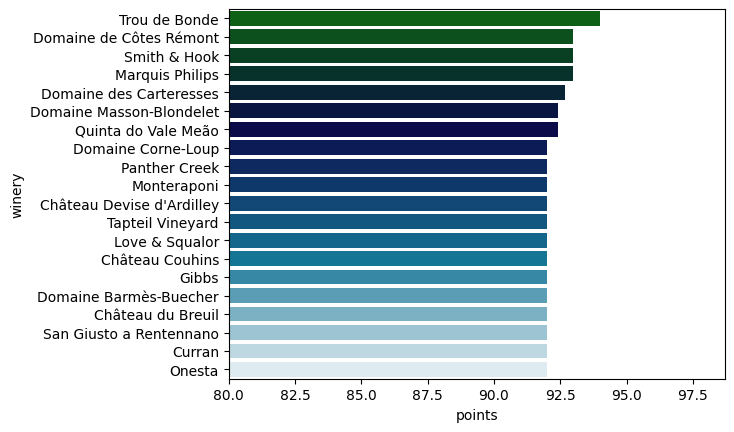

In [ ]:
plt.figure()
wines_under_20 = wine_eda[wine_eda['price'] < 20]
wines_under_20_count = wines_under_20.groupby(['winery'])['points'].mean().sort_values(ascending=False).to_frame()[:20]


sns.barplot(x=wines_under_20_count['points'], y=wines_under_20_count.index, data=wines_under_20_count, palette='ocean',orient='h')
plt.xlim(xmin=80)

<Axes: xlabel='price', ylabel='Count'>

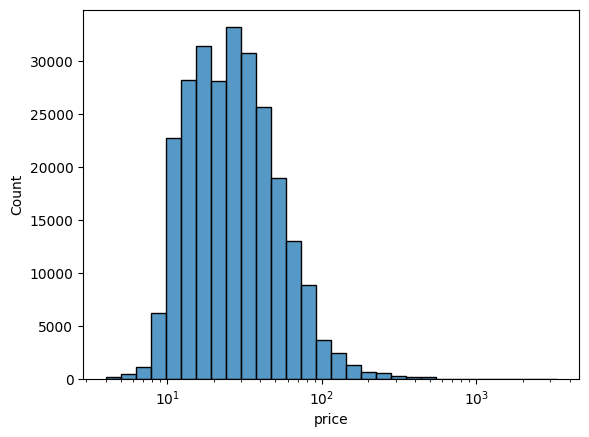

In [ ]:
sns.histplot(data=wine_eda.dropna(subset=['price']), x="price",bins=30, log_scale=True)

<Axes: xlabel='points', ylabel='Count'>

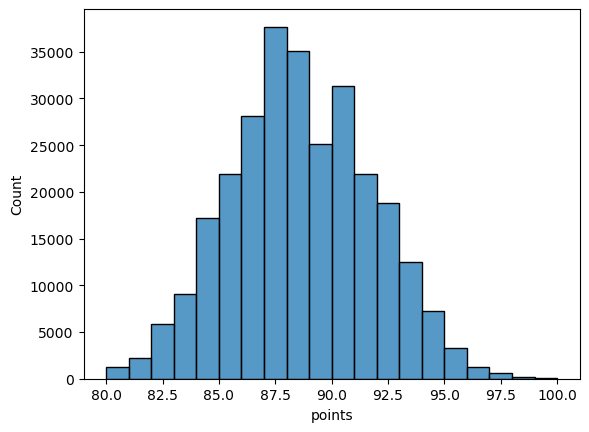

In [109]:
sns.histplot(data=wine_eda.dropna(subset=['points']), x="points",bins=20)

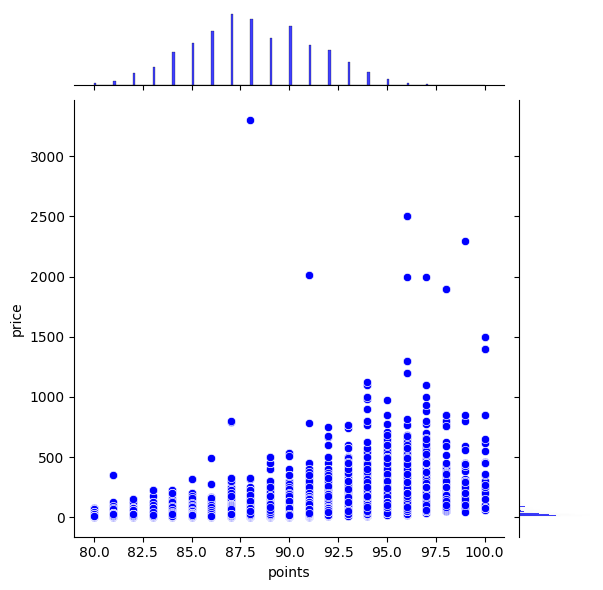

In [ ]:
sns.jointplot(x = wine_eda.dropna(subset=['points', 'price'])['points'],y = wine_eda.dropna(subset=['points', 'price'])['price'],color='b');

(-0.5, 399.5, 199.5, -0.5)

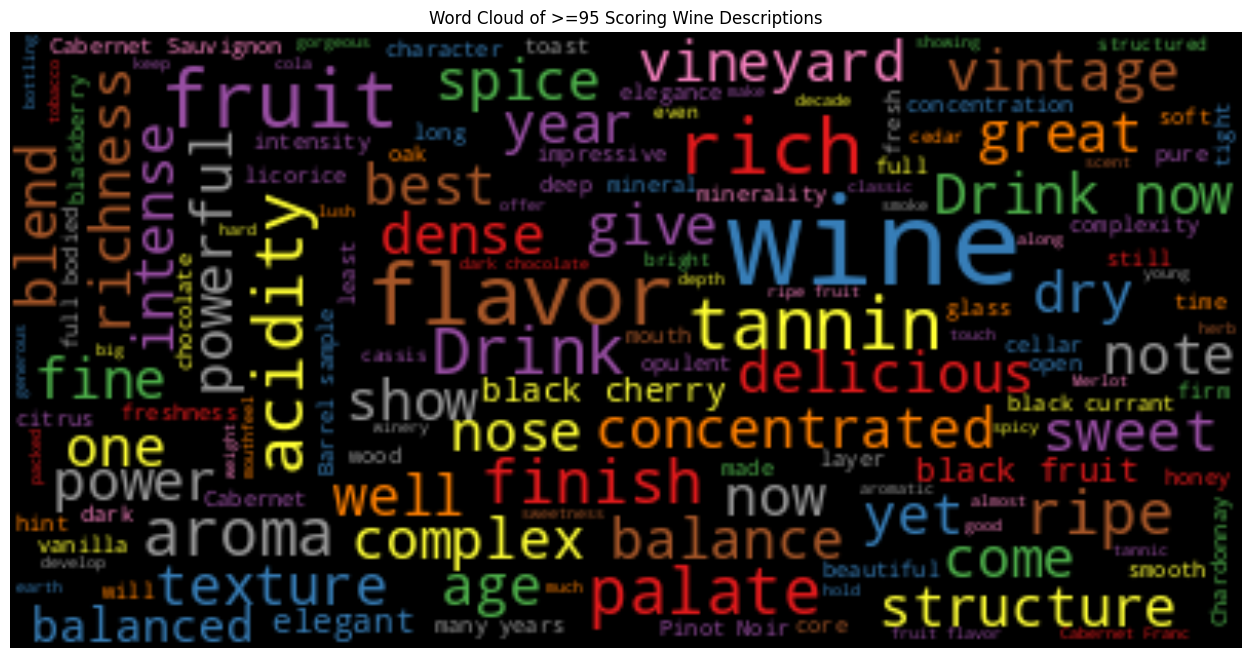

In [ ]:
plt.figure(figsize= (16,8))
plt.title('Word Cloud of >=95 Scoring Wine Descriptions')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine_eda[wine_eda['points'] >= 95]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

Text(0.5, 1.0, 'Mean Wine Price Per Province')

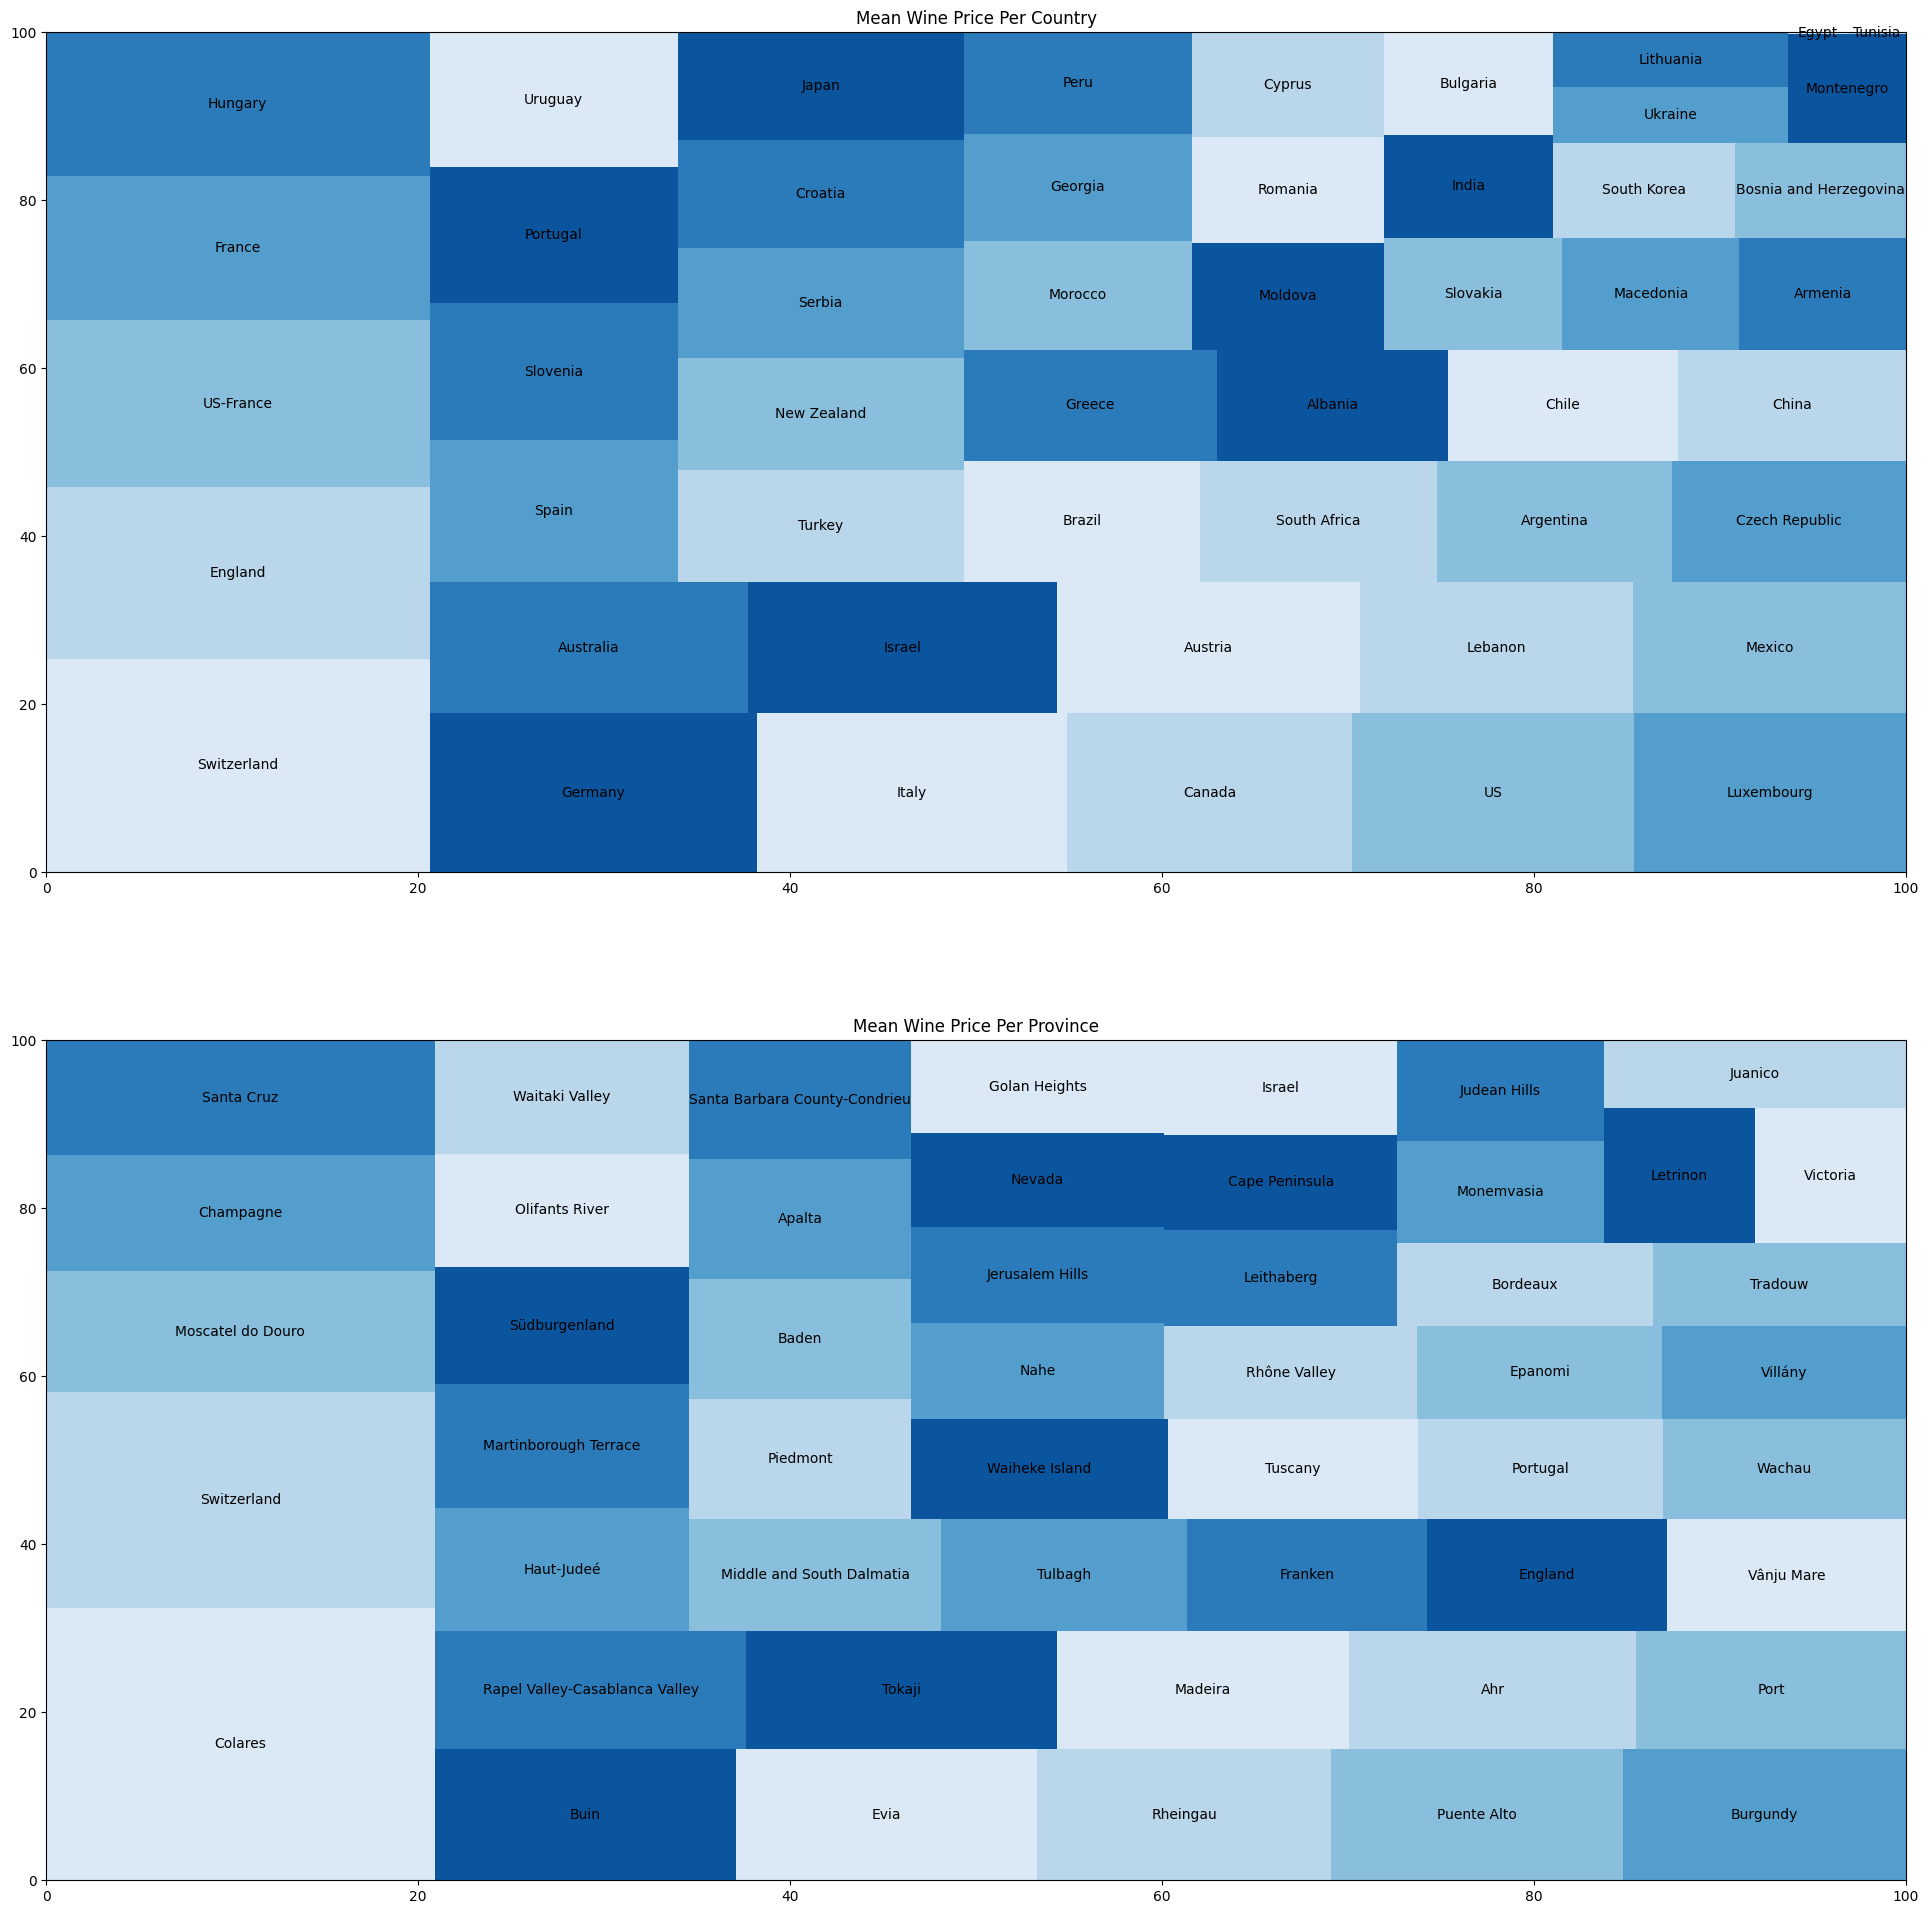

In [ ]:
fx, ax = plt.subplots(2, 1, figsize = (24, 24))
ax1, ax2 = ax.flatten()

means = wine.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame()
squarify.plot(means['price'].fillna(0.1),color=sns.color_palette('Blues'),label=means.index, ax=ax1)
ax1.set_title('Mean Wine Price Per Country')

means = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:50]
squarify.plot(means['price'].fillna(0.1), label=means.index, color=sns.color_palette('Blues'), ax=ax2)
ax2.set_title('Mean Wine Price Per Province')

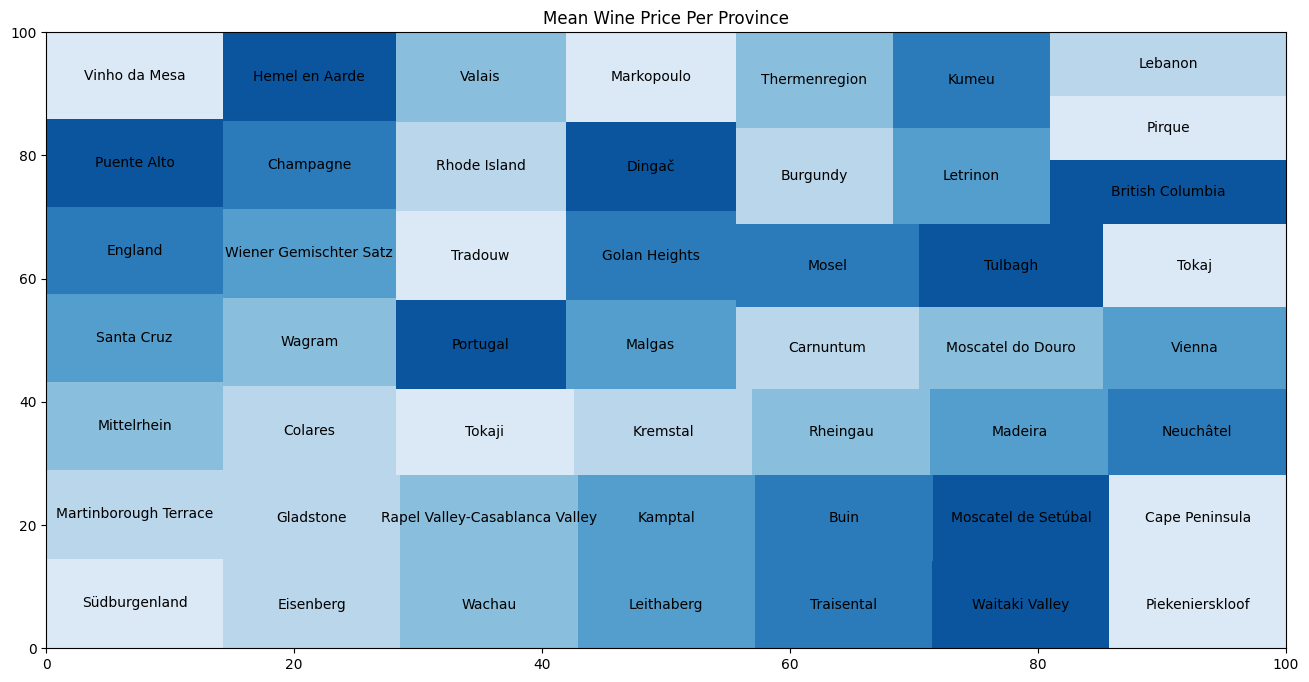

In [ ]:
means = wine.groupby(['province'])['points'].mean().sort_values(ascending=False).to_frame()[:50]
plt.figure(figsize=(16,8))
squarify.plot(means['points'].dropna(), label=means.index, color=sns.color_palette('Blues'))
plt.title('Mean Wine Price Per Province');

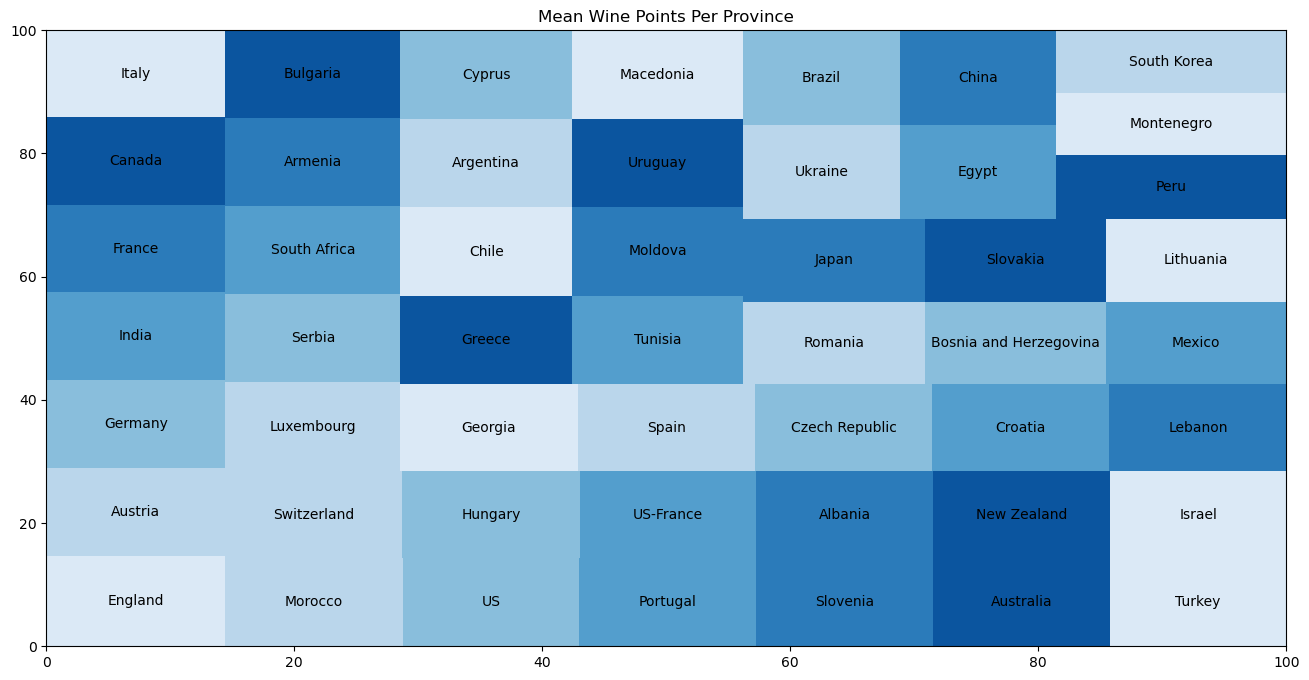

In [107]:
means = wine.groupby(['country'])['points'].mean().sort_values(ascending=False).to_frame()[:50]
plt.figure(figsize=(16,8))
squarify.plot(means['points'].dropna(), label=means.index, color=sns.color_palette('Blues'))
plt.title('Mean Wine Points Per Province');

Try to predict whether or not a wine is good (75th percentile rating) given variety and price

In [95]:
wine_rec1 = wine.dropna(subset=['points', 'variety', 'province'])
wine_rec1 = wine_rec1.sample(frac=1, random_state=42)
wine_rec1 = wine_rec1.head(int(len(wine_rec1) * 0.25))
wine_rec1_valid = wine_rec1.tail(int(len(wine_rec1) * 0.10))

In [96]:
# find the 75th percentile to determine points for a good wine
point_threshold = wine_rec1['points'].quantile(0.75)
y_train = [1 if point > point_threshold else 0 for point in wine_rec1['points']]
y_valid = [1 if point > point_threshold else 0 for point in wine_rec1_valid['points']]

In [97]:
province_encodings = {}
variety_encodings = {}

for province in wine['province']:
  if province not in province_encodings:
    province_encodings[province] = len(province_encodings)

for variety in wine['variety']:
  if variety not in variety_encodings:
    variety_encodings[variety] = len(variety_encodings)

In [72]:
def feat(d):
  variety_encoding = [0] * len(variety_encodings)
  if d['variety'] in variety_encodings:
    variety_encoding[variety_encodings[d['variety']]] = 1
  province_encoding = [0] * len(province_encodings)
  if d['province'] in province_encodings:
    province_encoding[province_encodings[d['province']]] = 1
  return province_encoding + variety_encoding

wine_rec1['features'] = wine_rec1.apply(feat, axis=1)
wine_rec1_valid['features'] = wine_rec1_valid.apply(feat, axis=1)
X_train = wine_rec1['features'].tolist()
X_valid = wine_rec1_valid['features'].tolist()

/var/folders/jv/2nmp5ss10n7g89l5_hdgn2l40000gn/T/ipykernel_69461/3272132522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_rec1_valid['features'] = wine_rec1_valid.apply(feat, axis=1)


In [73]:
model = linear_model.LogisticRegression(max_iter=10000, C=1)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print('Accuracy:', sum([1 if preds[i] == y_valid[i] else 0 for i in range(len(preds))]) / len(preds))

Accuracy: 0.763520843018751


Let's see how much adding a price feature improves our model

In [87]:
wine_rec2 = wine.dropna(subset=['points', 'variety', 'price', 'province'])
wine_rec2 = wine_rec2.sample(frac=1, random_state=42)
wine_rec2 = wine_rec2.head(int(len(wine_rec2) * 0.25))
wine_rec2_valid = wine_rec2.tail(int(len(wine_rec2) * 0.10))

# normalize prices
# max_price = wine['price'].max()
# wine_rec2['price'] = wine_rec2['price'] / max_price
# wine_rec2_valid['price'] = wine_rec2_valid['price'] / max_price

In [88]:
# find the 75th percentile to determine points for a good wine
point_threshold = wine_rec2['points'].quantile(0.75)
y_train = [1 if point > point_threshold else 0 for point in wine_rec2['points']]
y_valid = [1 if point > point_threshold else 0 for point in wine_rec2_valid['points']]

In [89]:
def feat(d):
  variety_encoding = [0] * len(variety_encodings)
  if d['variety'] in variety_encodings:
    variety_encoding[variety_encodings[d['variety']]] = 1
  province_encoding = [0] * len(province_encodings)
  if d['province'] in province_encodings:
    province_encoding[province_encodings[d['province']]] = 1
  return [d['price']] + province_encoding + variety_encoding

wine_rec2['features'] = wine_rec2.apply(feat, axis=1)
wine_rec2_valid['features'] = wine_rec2_valid.apply(feat, axis=1)
X_train = wine_rec2['features'].tolist()
X_valid = wine_rec2_valid['features'].tolist()

/var/folders/jv/2nmp5ss10n7g89l5_hdgn2l40000gn/T/ipykernel_69461/2333691004.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_rec2_valid['features'] = wine_rec2_valid.apply(feat, axis=1)


In [90]:
model = linear_model.LogisticRegression(max_iter=10000, C=1)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print('Accuracy:', sum([1 if preds[i] == y_valid[i] else 0 for i in range(len(preds))]) / len(preds))

Accuracy: 0.8134201146753448


Predict price with linear regression given variety and province

In [102]:
wine_rec3 = wine.dropna(subset=['price', 'variety', 'province'])
wine_rec3 = wine_rec3.sample(frac=1, random_state=42)
wine_rec3 = wine_rec3.head(int(len(wine_rec3) * 0.25))
wine_rec3_valid = wine_rec3.tail(int(len(wine_rec3) * 0.10))

In [103]:
y_train = wine_rec3['price'].tolist()
y_valid = wine_rec3_valid['price'].tolist()

In [104]:
def feat(d):
  variety_encoding = [0] * len(variety_encodings)
  if d['variety'] in variety_encodings:
    variety_encoding[variety_encodings[d['variety']]] = 1
  province_encoding = [0] * len(province_encodings)
  if d['province'] in province_encodings:
    province_encoding[province_encodings[d['province']]] = 1
  return province_encoding + variety_encoding

wine_rec3['features'] = wine_rec3.apply(feat, axis=1)
wine_rec3_valid['features'] = wine_rec3_valid.apply(feat, axis=1)
X_train = wine_rec3['features'].tolist()
X_valid = wine_rec3_valid['features'].tolist()

/var/folders/jv/2nmp5ss10n7g89l5_hdgn2l40000gn/T/ipykernel_69461/2220304808.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_rec3_valid['features'] = wine_rec3_valid.apply(feat, axis=1)


In [106]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_valid)
mse = ( sum([(preds[i] - y_valid[i]) ** 2 for i in range(len(preds))]) / len(preds) ) ** 0.5
print('MSE:', mse)

MSE: 31.572431242812144
